<a href="https://colab.research.google.com/github/Xeesto/UEP/blob/main/Entropia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
# data = datasets.load_iris()

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import log2

In [4]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

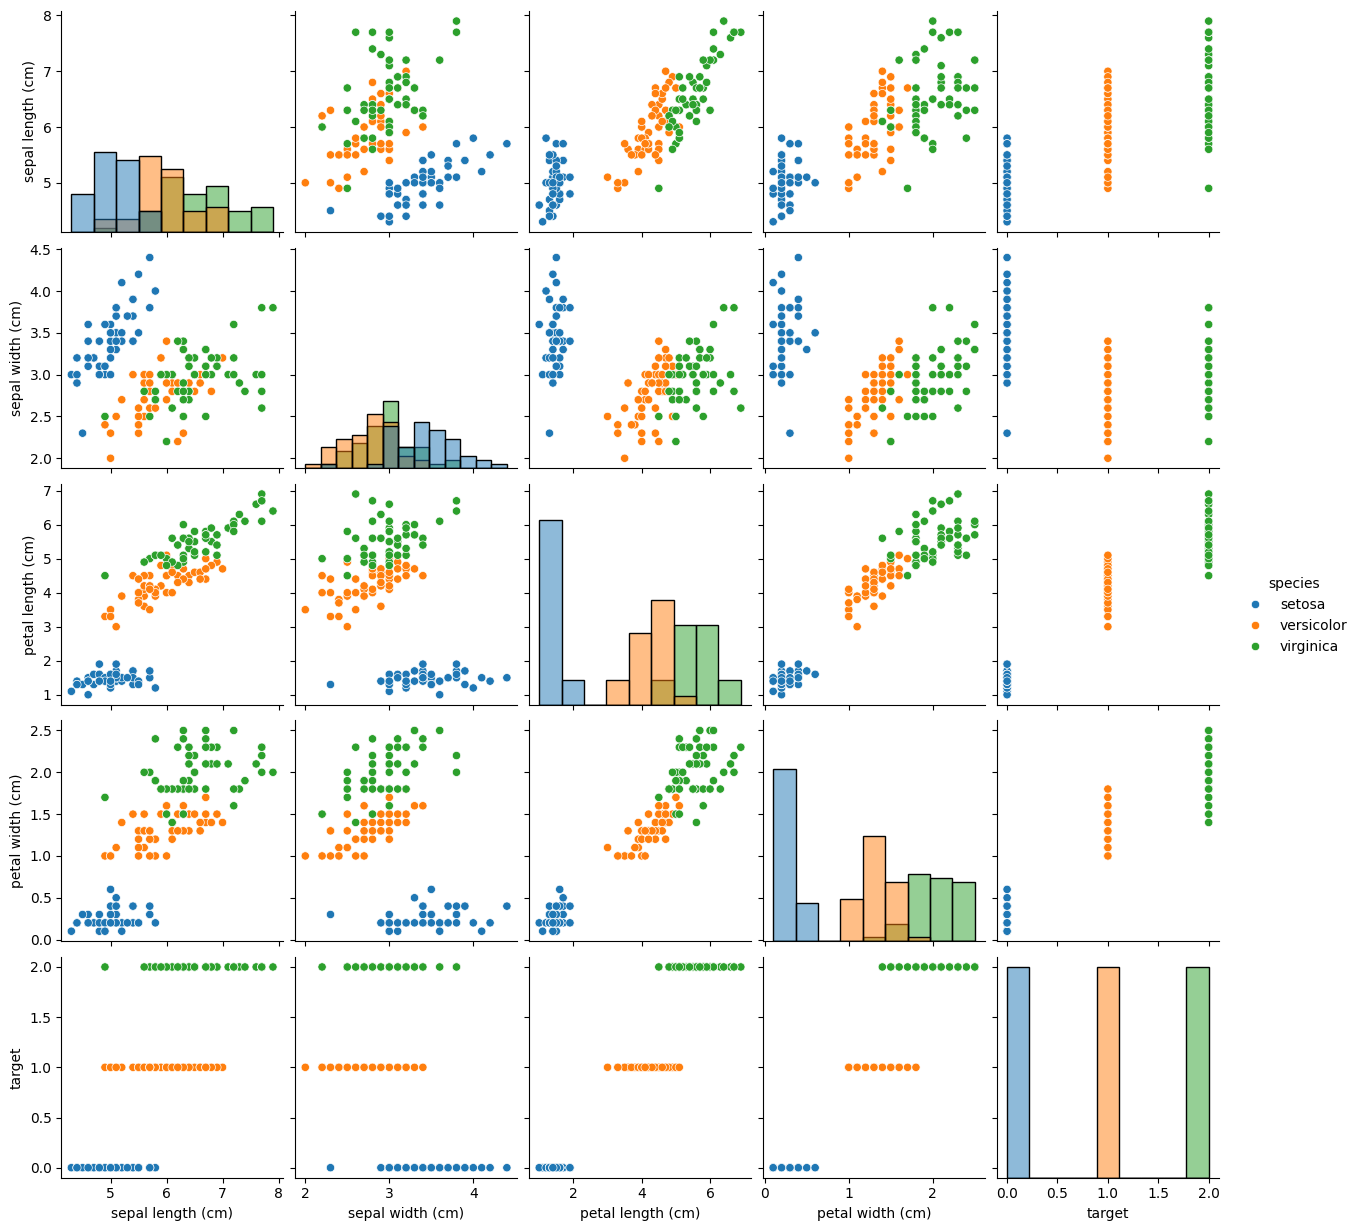

In [9]:
# Dodaj nazwy gatunków
df['species'] = df['target'].map(dict(enumerate(iris.target_names)))

# TWorzenie wykresu
sns.pairplot(df, hue="species", diag_kind="hist")
plt.show()

In [16]:
# Funkcja na obliczanie entropii
def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum([p * log2(p) for p in probs if p > 0])


In [65]:
# Entropia całego zbioru
entropy_total = entropy(df['target'])

print(f"Entropia całości: {entropy_total:.2f}")

Entropia całości: 1.58


In [19]:
# Entropia po podziale

def information_gain(df, feature, threshold):
    left = df[df[feature] <= threshold]
    right = df[df[feature] > threshold]

    total = len(df)
    weighted_entropy = (len(left)/total) * entropy(left['target']) + (len(right)/total) * entropy(right['target'])

    return entropy_total - weighted_entropy


In [20]:
# Liczenie zysku informacyjnego
gain_0_38 = information_gain(df, 'petal width (cm)', 0.38)
gain_1_50 = information_gain(df, 'petal width (cm)', 1.5)

print(f"Zysk informacyjny dla progu 0.38: {gain_0_38:.4f}")
print(f"Zysk informacyjny dla progu 1.5 : {gain_1_50:.4f}")


Zysk informacyjny dla progu 0.38: 0.6195
Zysk informacyjny dla progu 1.5 : 0.6656


Większy zysk daje 1.5, co daje lepszą miarę entropii.

In [68]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [53]:
# 1 - Przydzielenie danych
iris_data = datasets.load_iris()
X = iris_data.data
y = iris_data.target


In [59]:
# TESTOWE DODANIE SZUMU BO WYNIKI WYSZŁY IDEALNE :)
np.random.seed(42)
noise = np.random.normal(0, 0.2, X.shape)
X_noisy = X + noise

In [60]:
# 2 - Podział na zbiór treningowy i testowy (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
# 3 - Drzewo decyzyjne
tree_class = DecisionTreeClassifier(random_state=42)
tree_class.fit(X_train, y_train)
tree_preds = tree_class.predict(X_test)

In [62]:
# 4 - Las 15 drzew
forest_class = RandomForestClassifier(n_estimators=15, random_state=42)
forest_class.fit(X_train, y_train)
forest_preds = forest_class.predict(X_test)

In [63]:
# 5 - Wyniki
tree_accuracy = accuracy_score(y_test, tree_preds)
forest_accuracy = accuracy_score(y_test, forest_preds)

print(f"Dokładność drzewa decyzyjnego: {tree_accuracy:.2f}")
print(f"Dokładność lasu losowego (15 drzew): {forest_accuracy:.2f}")

Dokładność drzewa decyzyjnego: 0.9556
Dokładność lasu losowego (15 drzew): 1.0000


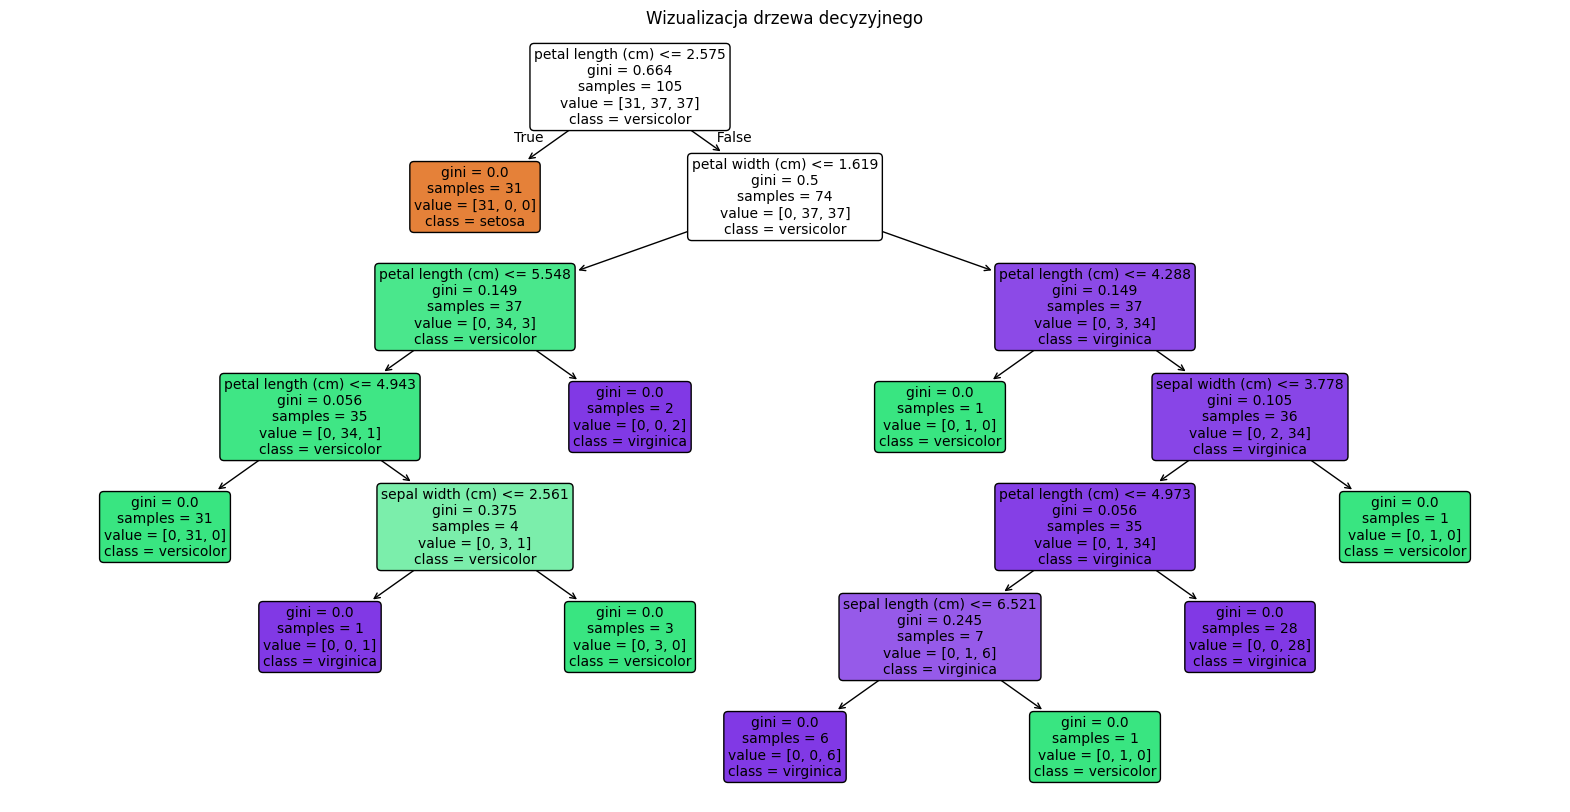

In [69]:
# Tworzenie wizualizacji drzewa decyzyjnego
plt.figure(figsize=(20, 10))
plot_tree(tree_class,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Zwizualizowane drzewo decyzyjne")
plt.show()
